In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
# Load the CSV File
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Check Overall Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [32]:
df.columns = df.columns.str.lower()
df.columns


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [34]:
df = df.rename(columns={
    'passengerid': 'passenger_id',
    'pclass': 'p_class',
    'sibsp': 'sib_sp',
    'parch': 'par_ch'  
})


In [35]:
# View Summary Statistics (Numeric Columns)
df.describe()

,passenger_id,survived,p_class,age,sib_sp,par_ch,fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.574163,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.721533,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# Summary for Categorical Columns
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [77]:
# Count Missing Values in Each Column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
# Missing Values in Percentage (%)
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

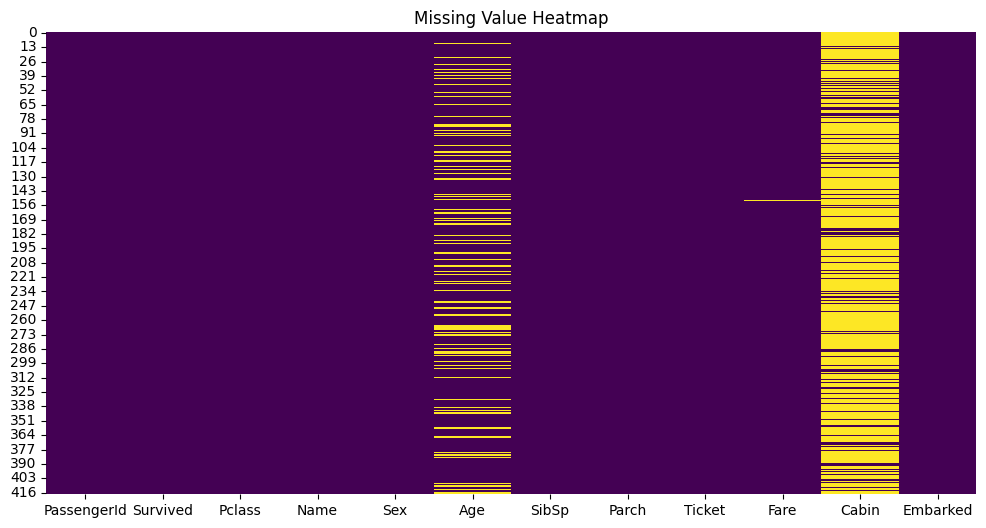

In [79]:
# Heatmap of Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [52]:
# Drop the “Cabin” Column
df.drop(columns=['cabin'], inplace=True, errors='ignore')

In [54]:
# Fill Missing Age Values (with Median)
df['age'] = df['age'].fillna(df['age'].median())

In [55]:
# Convert Age to Integer
df['age'] = df['age'].astype(int)

In [56]:
# Fill Missing Fare Value
df['fare'] = df['fare'].fillna(df['fare'].median())

In [57]:
# Verify All Missing Values Are Fixed
df.isnull().sum()

passenger_id    0
survived        0
p_class         0
name            0
sex             0
age             0
sib_sp          0
par_ch          0
ticket          0
fare            0
embarked        0
dtype: int64

In [58]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

numeric_cols, categorical_cols

(Index(['passenger_id', 'survived', 'p_class', 'age', 'sib_sp', 'par_ch',
        'fare'],
       dtype='object'),
 Index(['name', 'sex', 'ticket', 'embarked'], dtype='object'))

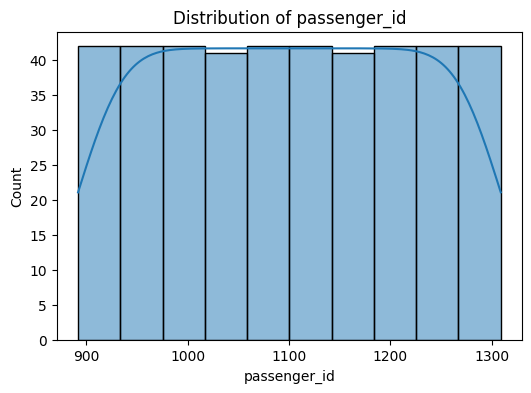

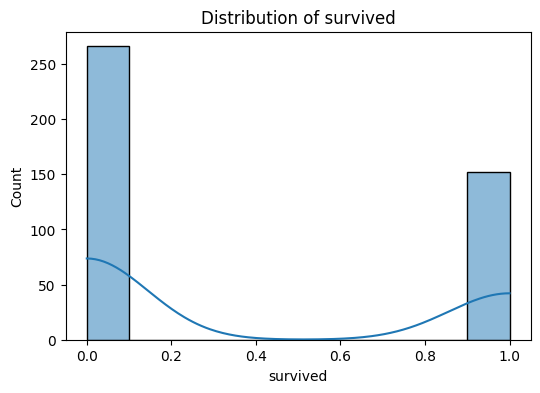

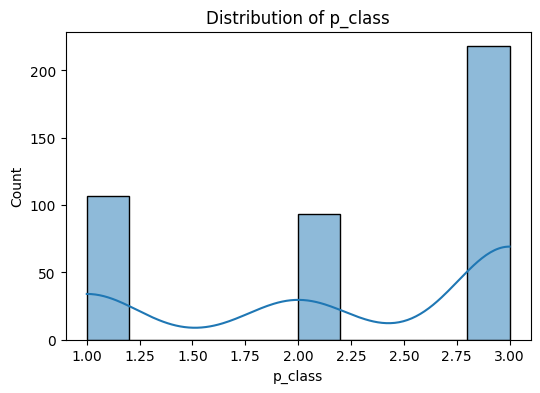

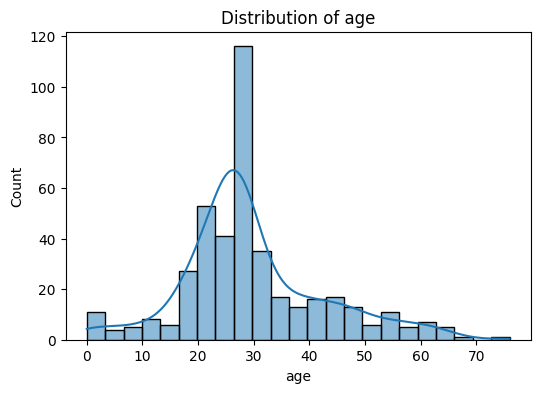

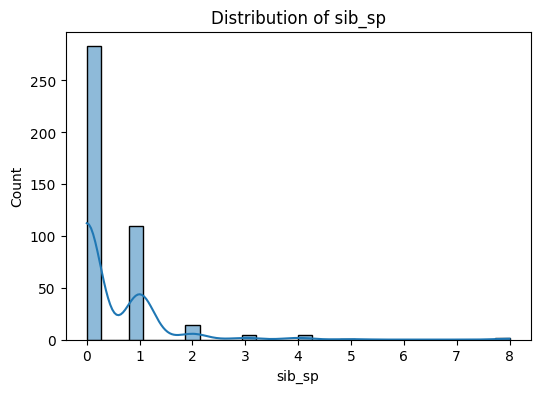

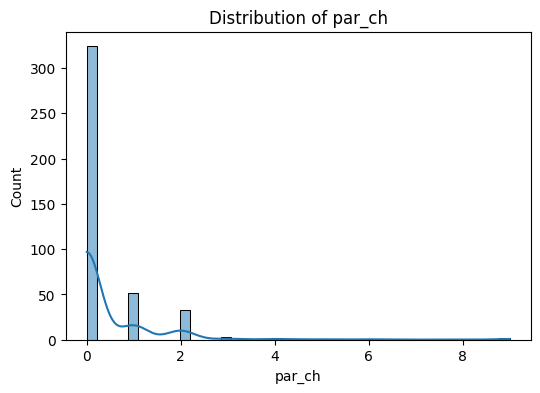

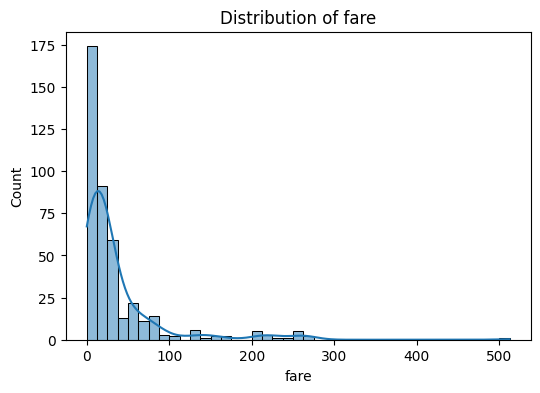

In [59]:
# Histplot – Numerical Distributions
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


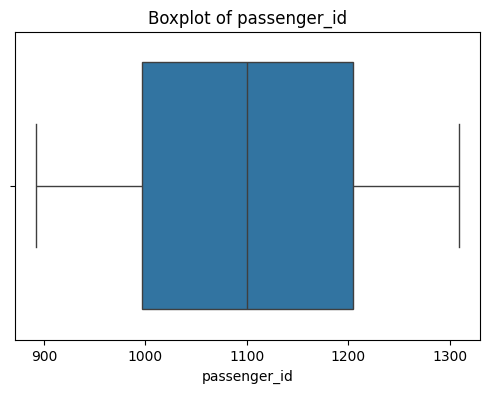

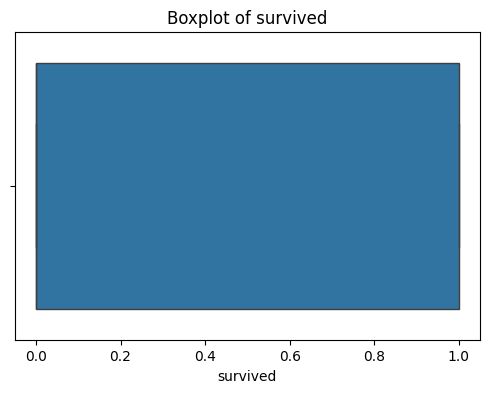

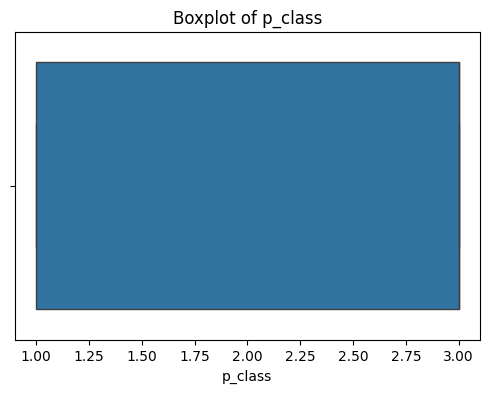

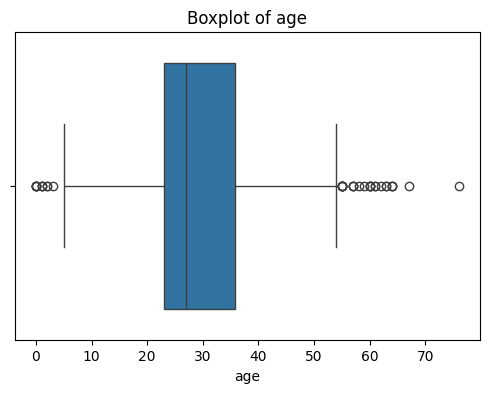

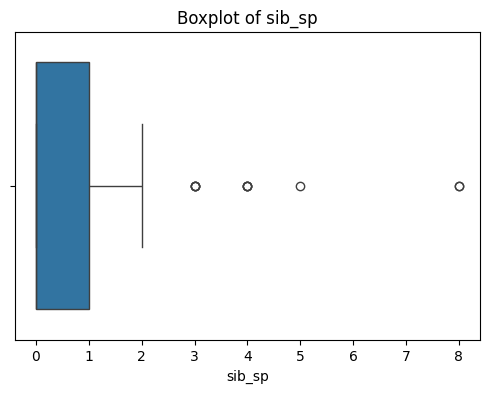

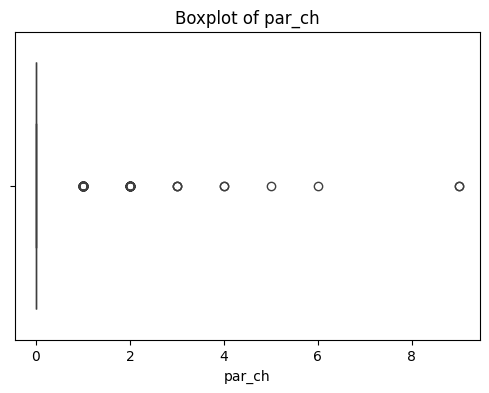

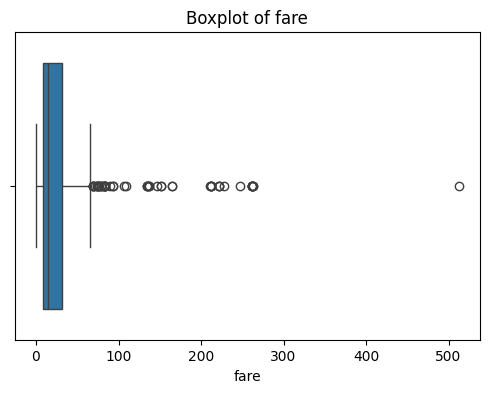

In [60]:
# Boxplot – Detect Outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Skipping 'name' (too many unique values: 418)


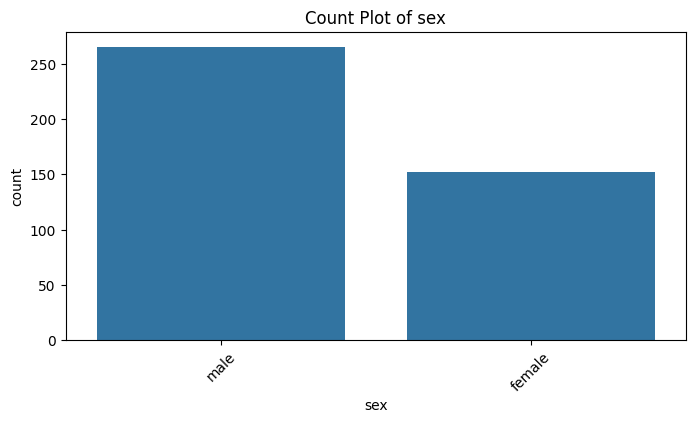

Skipping 'ticket' (too many unique values: 363)


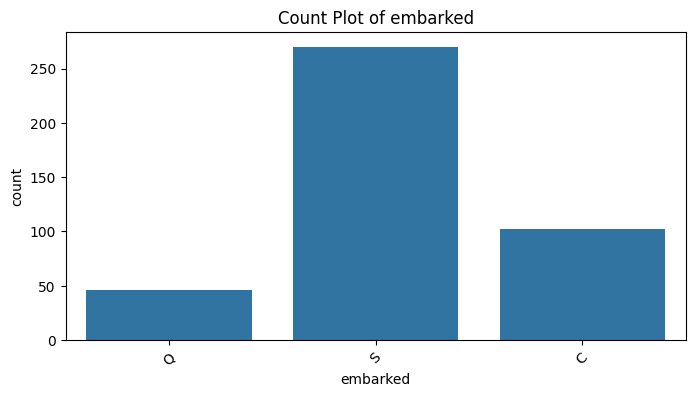

In [61]:
# Countplot – Categorical Variables
for col in categorical_cols:
   if df[col].nunique() <= 15:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()
   else:
       print(f"Skipping '{col}' (too many unique values: {df[col].nunique()})")


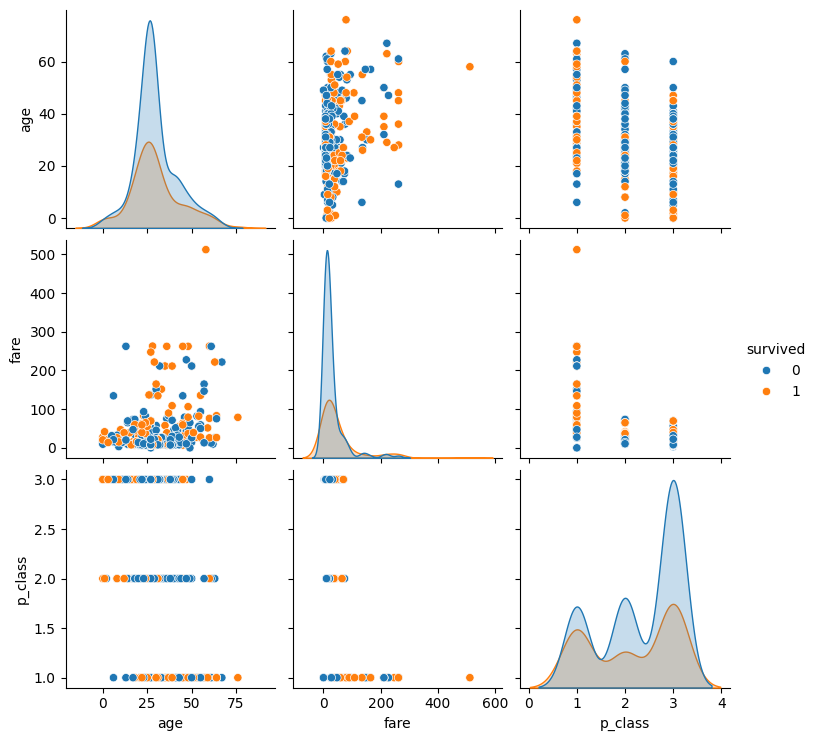

In [63]:
# Pairplot – Multivariate Analysis
sns.pairplot(df[['age', 'fare', 'survived', 'p_class']], hue='survived')
plt.show()


In [64]:
# Select Only Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])


In [65]:
# Compute Correlation Matrix
corr_matrix = numeric_cols.corr()
corr_matrix


,passenger_id,survived,p_class,age,sib_sp,par_ch,fare
passenger_id,1.000000,-0.023245,-0.026751,-0.031165,0.003818,0.043080,0.008633
survived,-0.023245,1.000000,-0.108615,0.008895,0.099943,0.159120,0.192036
p_class,-0.026751,-0.108615,1.000000,-0.468160,0.001087,0.018721,-0.577313
age,-0.031165,0.008895,-0.468160,1.000000,-0.071548,-0.044016,0.342227
sib_sp,0.003818,0.099943,0.001087,-0.071548,1.000000,0.306895,0.171912
par_ch,0.043080,0.159120,0.018721,-0.044016,0.306895,1.000000,0.230325
fare,0.008633,0.192036,-0.577313,0.342227,0.171912,0.230325,1.000000


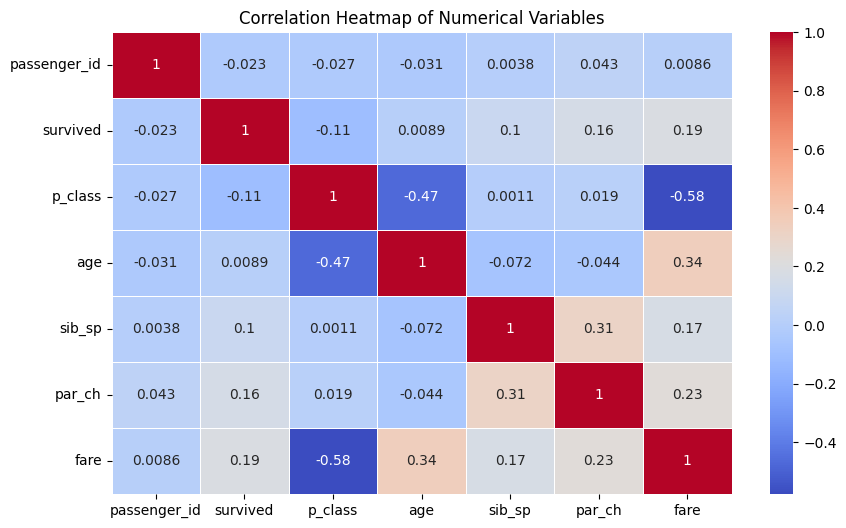

In [66]:
# Plot Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [67]:
# Survival Rate by Gender
df.groupby('sex')['survived'].mean()


sex
female    1.0
male      0.0
Name: survived, dtype: float64

In [68]:
# Average Age by Class
df.groupby('p_class')['age'].mean()


p_class
1    39.738318
2    28.666667
3    24.972477
Name: age, dtype: float64

In [69]:
# Multiple Aggregations Together
df.groupby('p_class').agg({
    'survived': ['mean', 'sum'],
    'age': 'mean',
    'fare': 'mean'
})


survived            age       fare
             mean sum       mean       mean
p_class                                    
1        0.467290  50  39.738318  94.280297
2        0.322581  30  28.666667  22.202104
3        0.330275  72  24.972477  12.468827

In [70]:
# Grouping by Multiple Columns
df.groupby(['sex', 'p_class'])['survived'].mean()


sex     p_class
female  1          1.0
        2          1.0
        3          1.0
male    1          0.0
        2          0.0
        3          0.0
Name: survived, dtype: float64

In [71]:
# Grouping + Count (How many passengers in each category)
df.groupby('p_class')['passenger_id'].count()


p_class
1    107
2     93
3    218
Name: passenger_id, dtype: int64

In [72]:
## Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])


In [73]:
# 1️⃣ Check skewness of all numeric columns
print("Skewness of numeric variables:")
display(numeric_cols.skew())

Skewness of numeric variables:


passenger_id    0.000000
survived        0.568991
p_class        -0.534170
age             0.651015
sib_sp          4.168337
par_ch          4.654462
fare            3.692299
dtype: float64

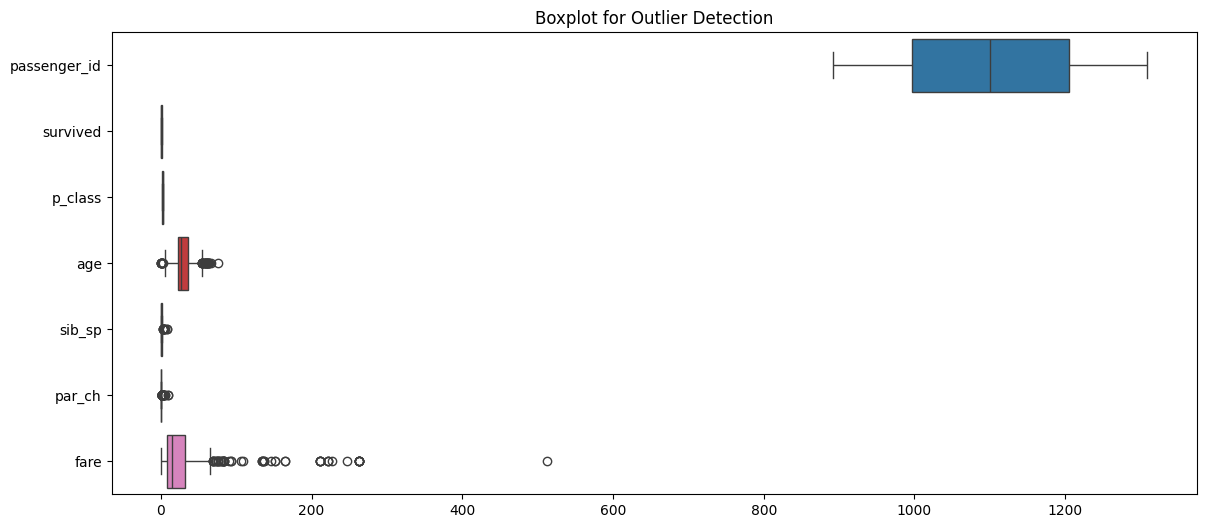

In [74]:
# 2️⃣ Boxplots to visually check outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_cols, orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [75]:
# 3️⃣ Detect outliers using IQR for each column
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

outlier_summary

{'passenger_id': np.int64(0),
 'survived': np.int64(0),
 'p_class': np.int64(0),
 'age': np.int64(36),
 'sib_sp': np.int64(11),
 'par_ch': np.int64(94),
 'fare': np.int64(55)}